# Exploratory Data Analysis on all fluid inclusion data (not geolocated)

- Clean data - DONE
- Use [pandas profiling](https://github.com/pandas-profiling/pandas-profiling)
  - This did not work due to:
      `MemoryError: Unable to allocate 319. TiB for an array with shape (43812872618454,) and data type float64`
- Use [missingno](https://github.com/ResidentMario/missingno) as first pass
- Use [seaborn](https://seaborn.pydata.org/examples/index.html) for quick plots

Data files:

In [1]:
clean = './data/cleaned_types.csv'

Imports

In [88]:
import numpy as np
import pandas as pd

import missingno as msno
from pandas_profiling import ProfileReport

import matplotlib.pyplot as plt
import seaborn as sns

from ipywidgets import interact

## First pass

In [3]:
df = pd.read_csv(clean)
pd.set_option('display.max_columns', None)
df.head()

,Type,Geothermal Province,State,Field,Well ID,Sample ID,Depth (ft),AMU1,AMU2,AMU3,AMU4,AMU5,AMU6,AMU7,AMU8,AMU9,AMU10,AMU11,AMU12,AMU13,AMU14,AMU15,AMU16,AMU17,AMU18,AMU19,AMU20,AMU21,AMU22,AMU23,AMU24,AMU25,AMU26,AMU27,AMU28,AMU29,AMU30,AMU31,AMU32,AMU33,AMU34,AMU35,AMU36,AMU37,AMU38,AMU39,AMU40,AMU41,AMU42,AMU43,AMU44,AMU45,AMU46,AMU47,AMU48,AMU49,AMU50,AMU51,AMU52,AMU53,AMU54,AMU55,AMU56,AMU57,AMU58,AMU59,AMU60,AMU61,AMU62,AMU63,AMU64,AMU65,AMU66,AMU67,AMU68,AMU69,AMU70,AMU71,AMU72,AMU73,AMU74,AMU75,AMU76,AMU77,AMU78,AMU79,AMU80,AMU81,AMU82,AMU83,AMU84,AMU85,AMU86,AMU87,AMU88,AMU89,AMU90,AMU91,AMU92,AMU93,AMU94,AMU95,AMU96,AMU97,AMU98,AMU99,AMU100.UNKN,AMU101.UNKN,AMU102.UNKN,AMU103.UNKN,AMU104.UNKN,AMU105.UNKN,AMU106.UNKN,AMU107.UNKN,AMU108.UNKN,AMU109.UNKN,AMU110.UNKN,AMU111.UNKN,AMU112.UNKN,AMU113.UNKN,AMU114.UNKN,AMU115.UNKN,AMU116.UNKN,AMU117.UNKN,AMU118.UNKN,AMU119.UNKN,AMU120.UNKN,AMU121.UNKN,AMU122.UNKN,AMU123.UNKN,AMU124.UNKN,AMU125.UNKN,AMU126.UNKN,AMU127.UNKN,AMU128.UNKN,AMU129.UNKN,AMU130.UNKN,AMU131.UNKN,AMU132.UNKN,AMU133.UNKN,AMU134.UNKN,AMU135.UNKN,AMU136.UNKN,AMU137.UNKN,AMU138.UNKN,AMU139.UNKN,AMU140.UNKN,AMU141.UNKN,AMU142.UNKN,AMU143.UNKN,AMU144.UNKN,AMU145.UNKN,AMU146.UNKN,AMU147.UNKN,AMU148.UNKN,AMU149.UNKN,AMU150.UNKN,AMU151.UNKN,AMU152.UNKN,AMU153.UNKN,AMU154.UNKN,AMU155.UNKN,AMU156.UNKN,AMU157.UNKN,AMU158.UNKN,AMU159.UNKN,AMU160.UNKN,AMU161.UNKN,AMU162.UNKN,AMU163.UNKN,AMU164.UNKN,AMU165.UNKN,AMU166.UNKN,AMU167.UNKN,AMU168.UNKN,AMU169.UNKN,AMU170.UNKN,AMU171.UNKN,AMU172.UNKN,AMU173.UNKN,AMU174.UNKN,AMU175.UNKN,AMU176.UNKN,AMU177.UNKN,AMU178.UNKN,AMU179.UNKN,AMU180.UNKN,FIT Well,Unnamed: 188,Unnamed: 8,Unnamed: 9,Unnamed: 187
0,Transform Extension,Sierra Nevada,California,COSO,15A-17,2202.0,510.0,0.0,294200.0,53.30,6.455000e-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88430.0,5079.0,66790.0,30300.0,378600.0,98680.0,224600.0,0.0,0.0,282.9,11060.0,1.479000e+02,155.90,754.4,8497.0,206200.0,1530000.0,15190.0,2737.0,570.1,8456.00,1126.0,8829.0,288.7,0.00,195.5,1045.0,5693.0,6084.0,18260.0,7317.0,51020.0,1380000.0,56790.0,5054.0,0.0,0.0,0.000000e+00,421.10,192.80,6.827000e-11,3.927000e-11,2.681000e+02,1254.0,2515.0,3044.0,624.8,1.522000e-10,270.000,0.000,70.64,367.1,415.6,154.60,0.00,238.50,283.8,593.2,649.5,795.0,239.00,11.71,79.37,218.60,224.30,32.86,603.8,58.46,156.10,0.00,47.97,155.30,93.72,266.4,78.49,1.402,15.04,169.6,0.0,0.0,0.0,323.30,0.00,1.691,16.87,221.50,25.34,21.940,35.880,0.00,0.0,0.0,0.0,0.0,0.0,596.9,0.0,0.00,29.200,33.94,38.620,27.35,7.475,0.00,0.0000,6.527,1607.00,2109.0,31.710,0.00,31.41,37.170,28.190,0.000,5.205,14.820,0.00,0.0,1022.0,0.0,106.0,102.7,21.21,79.68,130.100,0.00,30.26,0.00,2.570,258.5,210.8,0.0,0.000,472.1,0.0,0.00,0.00,285.30,67.74,0.00,0.00,0.00,69.27,0.0,7009.0,29.7300,NaN,0.00,0.0,442.7,0.00,145.70,0.000,0.0,1055.0,0.0,0.000,10960000.0,0.0,41.940,0.0,0.000,0.00,0.00,0.0,0.00,2434.00,0.0,0.000,NaN,NaN,NaN,NaN,NaN
1,Transform Extension,Sierra Nevada,California,COSO,15A-17,2203.0,530.0,0.0,320600.0,48.95,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,139200.0,3151.0,38760.0,62420.0,4367000.0,236000.0,511900.0,0.0,0.0,252.4,13800.0,9.894000e-12,95.07,535.4,5247.0,171900.0,945500.0,10890.0,2670.0,1079.0,13810.00,0.0,7551.0,0.0,0.00,203.8,351.7,1784.0,2762.0,14840.0,3233.0,92310.0,2615000.0,76580.0,6120.0,0.0,0.0,1.911000e+02,395.30,361.90,0.000000e+00,3.957000e+01,3.416000e-11,1699.0,1016.0,2696.0,163.0,1.524000e-10,153.700,27.460,16.07,1693.0,324.6,15.44,18.17,96.81,70.5,381.1,342.0,334.1,95.34,21.39,0.00,40.75,91.02,85.20,373.4,101.40,0.00,0.00,0.00,75.64,75.92,200.3,44.11,3.224,1125.00,0.0,0.0,451.4,583.2,0.00,33.30,0.000,79.69,17.98,19.65,83.230,8.254,0.00,307.1,0.0,0.0,0.0,0.0,51.1,0.0,0.00,77.890,18.34,0.000,43.72,11.200,32.39,0.1626,0.000,169.80,1927.0,0.000,20.53,33.24,7.305,2.915,19.460,27.590,18.990,17.27,61.2,0.0,1776.0,278.7,145.3,123.90,97.80,7.901,77.50,0.00,0.00,0.000,0.0,0.0,684.4,0.000,561.1,122.9,28.02,15.47,0.00,0.00,0.00,129.60,0.00,0.00,0.0,7181.0,0.0000,NaN,0.00,0.0,0.0,2

In [106]:
dfselected = df[df['Well ID'] == '15A-17']

In [107]:
dfselected

,Type,Geothermal Province,State,Field,Well ID,Sample ID,Depth (ft),AMU1,AMU2,AMU3,AMU4,AMU5,AMU6,AMU7,AMU8,AMU9,AMU10,AMU11,AMU12,AMU13,AMU14,AMU15,AMU16,AMU17,AMU18,AMU19,AMU20,AMU21,AMU22,AMU23,AMU24,AMU25,AMU26,AMU27,AMU28,AMU29,AMU30,AMU31,AMU32,AMU33,AMU34,AMU35,AMU36,AMU37,AMU38,AMU39,AMU40,AMU41,AMU42,AMU43,AMU44,AMU45,AMU46,AMU47,AMU48,AMU49,AMU50,AMU51,AMU52,AMU53,AMU54,AMU55,AMU56,AMU57,AMU58,AMU59,AMU60,AMU61,AMU62,AMU63,AMU64,AMU65,AMU66,AMU67,AMU68,AMU69,AMU70,AMU71,AMU72,AMU73,AMU74,AMU75,AMU76,AMU77,AMU78,AMU79,AMU80,AMU81,AMU82,AMU83,AMU84,AMU85,AMU86,AMU87,AMU88,AMU89,AMU90,AMU91,AMU92,AMU93,AMU94,AMU95,AMU96,AMU97,AMU98,AMU99,AMU100.UNKN,AMU101.UNKN,AMU102.UNKN,AMU103.UNKN,AMU104.UNKN,AMU105.UNKN,AMU106.UNKN,AMU107.UNKN,AMU108.UNKN,AMU109.UNKN,AMU110.UNKN,AMU111.UNKN,AMU112.UNKN,AMU113.UNKN,AMU114.UNKN,AMU115.UNKN,AMU116.UNKN,AMU117.UNKN,AMU118.UNKN,AMU119.UNKN,AMU120.UNKN,AMU121.UNKN,AMU122.UNKN,AMU123.UNKN,AMU124.UNKN,AMU125.UNKN,AMU126.UNKN,AMU127.UNKN,AMU128.UNKN,AMU129.UNKN,AMU130.UNKN,AMU131.UNKN,AMU132.UNKN,AMU133.UNKN,AMU134.UNKN,AMU135.UNKN,AMU136.UNKN,AMU137.UNKN,AMU138.UNKN,AMU139.UNKN,AMU140.UNKN,AMU141.UNKN,AMU142.UNKN,AMU143.UNKN,AMU144.UNKN,AMU145.UNKN,AMU146.UNKN,AMU147.UNKN,AMU148.UNKN,AMU149.UNKN,AMU150.UNKN,AMU151.UNKN,AMU152.UNKN,AMU153.UNKN,AMU154.UNKN,AMU155.UNKN,AMU156.UNKN,AMU157.UNKN,AMU158.UNKN,AMU159.UNKN,AMU160.UNKN,AMU161.UNKN,AMU162.UNKN,AMU163.UNKN,AMU164.UNKN,AMU165.UNKN,AMU166.UNKN,AMU167.UNKN,AMU168.UNKN,AMU169.UNKN,AMU170.UNKN,AMU171.UNKN,AMU172.UNKN,AMU173.UNKN,AMU174.UNKN,AMU175.UNKN,AMU176.UNKN,AMU177.UNKN,AMU178.UNKN,AMU179.UNKN,AMU180.UNKN,FIT Well,Unnamed: 188,Unnamed: 8,Unnamed: 9,Unnamed: 187
0,Transform Extension,Sierra Nevada,California,COSO,15A-17,2202.0,510.0,0.0,294200.0,53.30,6.455000e-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88430.0,5079.0,66790.0,30300.0,378600.0,98680.0,224600.0,0.0,0.0,282.90,11060.0,1.479000e+02,155.90,754.4,8497.0,206200.0,1530000.0,15190.0,2737.0,570.1,8456.00,1126.0,8829.0,288.7,0.00,195.5,1045.0,5693.0,6084.0,18260.0,7317.0,51020.0,1380000.0,56790.0,5054.0,0.000000e+00,0.00,0.000000e+00,421.10,192.80,6.827000e-11,3.927000e-11,2.681000e+02,1254.0,2515.0,3044.0,624.8,1.522000e-10,270.000,0.000,70.64,367.10,415.6,154.60,0.00,238.50,283.8,593.20,649.5,795.0,239.00,11.71,79.37,218.60,224.30,32.86,603.8,58.46,156.10,0.00,47.97,155.300,93.72,266.400,78.49,1.402,15.04,169.6,0.0,0.0,0.0,323.30,0.00,1.6910,16.87,221.50,25.34,21.940,35.880,0.00,0.0,0.00,0.0,0.0,0.00,596.90,0.0,0.00,29.200,33.94,38.620,27.35,7.475,0.000,0.0000,6.527,1607.00,2109.00,31.710,0.0000,31.410,37.170,28.190,0.000,5.205,14.820,0.0000,0.000,1022.00,0.0000,106.000,102.700,21.21000,79.6800,130.100,0.000,30.2600,0.000,2.570,258.5000,210.800,0.000,0.000,472.1000,0.0000,0.0000,0.0000,285.3000,67.7400,0.000,0.00000,0.000,6.927000e+01,0.00,7009.0000,29.7300,NaN,0.0000,0.0000,442.7000,0.000000e+00,145.700,0.0000,0.000,1055.00000,0.000,0.000,1.096000e+07,0.0,4.194000e+01,0.0,0.0000,0.0000,0.000000e+00,0.0000,0.000000e+00,2.434000e+03,0.000000e+00,0.000,NaN,NaN,NaN,NaN,NaN
1,Transform Extension,Sierra Nevada,California,COSO,15A-17,2203.0,530.0,0.0,320600.0,48.95,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,139200.0,3151.0,38760.0,62420.0,4367000.0,236000.0,511900.0,0.0,0.0,252.40,13800.0,9.894000e-12,95.07,535.4,5247.0,171900.0,945500.0,10890.0,2670.0,1079.0,13810.00,0.0,7551.0,0.0,0.00,203.8,351.7,1784.0,2762.0,14840.0,3233.0,92310.0,2615000.0,76580.0,6120.0,0.000000e+00,0.00,1.911000e+02,395.30,361.90,0.000000e+00,3.957000e+01,3.416000e-11,1699.0,1016.0,2696.0,163.0,1.524000e-10,153.700,27.460,16.07,1693.00,324.6,15.44,18.17,96.81,70.5,381.10,342.0,334.1,95.34,21.39,0.00,40.75,91.02,85.20,373.4,101.40,0.00,0.00,0.00,75.640,75.92,200.300,44.11,3.224,1125.00,0.0,0.0,451.4,583.2,0.00,33.30,0.0000,79.69,17.98,19.65,83.230,8.254,0.00,307.1,0.00,0.0,0.0,0.00,51.10,0.0,0.00,77.890,18.34,0.000,43.72,11.200,32.390,0.1626,0.000,169.80,1927.00,0.000,20.5300,33.240,7.305,2.915,19.460,27.590,18.990,17.2700,6

In [108]:
amu_list = df.columns

In [109]:
amu_list = amu_list[7:-5]

In [110]:
amu_list

Index(['AMU1', 'AMU2', 'AMU3', 'AMU4', 'AMU5', 'AMU6', 'AMU7', 'AMU8', 'AMU9',
       'AMU10',
       ...
       'AMU171.UNKN', 'AMU172.UNKN', 'AMU173.UNKN', 'AMU174.UNKN',
       'AMU175.UNKN', 'AMU176.UNKN', 'AMU177.UNKN', 'AMU178.UNKN',
       'AMU179.UNKN', 'AMU180.UNKN'],
      dtype='object', length=180)

In [111]:
amu = dfselected[amu_list]

In [112]:
amu

,AMU1,AMU2,AMU3,AMU4,AMU5,AMU6,AMU7,AMU8,AMU9,AMU10,AMU11,AMU12,AMU13,AMU14,AMU15,AMU16,AMU17,AMU18,AMU19,AMU20,AMU21,AMU22,AMU23,AMU24,AMU25,AMU26,AMU27,AMU28,AMU29,AMU30,AMU31,AMU32,AMU33,AMU34,AMU35,AMU36,AMU37,AMU38,AMU39,AMU40,AMU41,AMU42,AMU43,AMU44,AMU45,AMU46,AMU47,AMU48,AMU49,AMU50,AMU51,AMU52,AMU53,AMU54,AMU55,AMU56,AMU57,AMU58,AMU59,AMU60,AMU61,AMU62,AMU63,AMU64,AMU65,AMU66,AMU67,AMU68,AMU69,AMU70,AMU71,AMU72,AMU73,AMU74,AMU75,AMU76,AMU77,AMU78,AMU79,AMU80,AMU81,AMU82,AMU83,AMU84,AMU85,AMU86,AMU87,AMU88,AMU89,AMU90,AMU91,AMU92,AMU93,AMU94,AMU95,AMU96,AMU97,AMU98,AMU99,AMU100.UNKN,AMU101.UNKN,AMU102.UNKN,AMU103.UNKN,AMU104.UNKN,AMU105.UNKN,AMU106.UNKN,AMU107.UNKN,AMU108.UNKN,AMU109.UNKN,AMU110.UNKN,AMU111.UNKN,AMU112.UNKN,AMU113.UNKN,AMU114.UNKN,AMU115.UNKN,AMU116.UNKN,AMU117.UNKN,AMU118.UNKN,AMU119.UNKN,AMU120.UNKN,AMU121.UNKN,AMU122.UNKN,AMU123.UNKN,AMU124.UNKN,AMU125.UNKN,AMU126.UNKN,AMU127.UNKN,AMU128.UNKN,AMU129.UNKN,AMU130.UNKN,AMU131.UNKN,AMU132.UNKN,AMU133.UNKN,AMU134.UNKN,AMU135.UNKN,AMU136.UNKN,AMU137.UNKN,AMU138.UNKN,AMU139.UNKN,AMU140.UNKN,AMU141.UNKN,AMU142.UNKN,AMU143.UNKN,AMU144.UNKN,AMU145.UNKN,AMU146.UNKN,AMU147.UNKN,AMU148.UNKN,AMU149.UNKN,AMU150.UNKN,AMU151.UNKN,AMU152.UNKN,AMU153.UNKN,AMU154.UNKN,AMU155.UNKN,AMU156.UNKN,AMU157.UNKN,AMU158.UNKN,AMU159.UNKN,AMU160.UNKN,AMU161.UNKN,AMU162.UNKN,AMU163.UNKN,AMU164.UNKN,AMU165.UNKN,AMU166.UNKN,AMU167.UNKN,AMU168.UNKN,AMU169.UNKN,AMU170.UNKN,AMU171.UNKN,AMU172.UNKN,AMU173.UNKN,AMU174.UNKN,AMU175.UNKN,AMU176.UNKN,AMU177.UNKN,AMU178.UNKN,AMU179.UNKN,AMU180.UNKN
0,0.0,294200.0,53.30,6.455000e-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88430.0,5079.0,66790.0,30300.0,378600.0,98680.0,224600.0,0.0,0.0,282.90,11060.0,1.479000e+02,155.90,754.4,8497.0,206200.0,1530000.0,15190.0,2737.0,570.1,8456.00,1126.0,8829.0,288.7,0.00,195.5,1045.0,5693.0,6084.0,18260.0,7317.0,51020.0,1380000.0,56790.0,5054.0,0.000000e+00,0.00,0.000000e+00,421.10,192.80,6.827000e-11,3.927000e-11,2.681000e+02,1254.0,2515.0,3044.0,624.8,1.522000e-10,270.000,0.000,70.64,367.10,415.6,154.60,0.00,238.50,283.8,593.20,649.5,795.0,239.00,11.71,79.37,218.60,224.30,32.86,603.8,58.46,156.10,0.00,47.97,155.300,93.72,266.400,78.49,1.402,15.04,169.6,0.0,0.0,0.0,323.30,0.00,1.6910,16.87,221.50,25.34,21.940,35.880,0.00,0.0,0.00,0.0,0.0,0.00,596.90,0.0,0.00,29.200,33.94,38.620,27.35,7.475,0.000,0.0000,6.527,1607.00,2109.00,31.710,0.0000,31.410,37.170,28.190,0.000,5.205,14.820,0.0000,0.000,1022.00,0.0000,106.000,102.700,21.21000,79.6800,130.100,0.000,30.2600,0.000,2.570,258.5000,210.800,0.000,0.000,472.1000,0.0000,0.0000,0.0000,285.3000,67.7400,0.000,0.00000,0.000,6.927000e+01,0.00,7009.0000,29.7300,NaN,0.0000,0.0000,442.7000,0.000000e+00,145.700,0.0000,0.000,1055.00000,0.000,0.000,1.096000e+07,0.0,4.194000e+01,0.0,0.0000,0.0000,0.000000e+00,0.0000,0.000000e+00,2.434000e+03,0.000000e+00,0.000
1,0.0,320600.0,48.95,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,139200.0,3151.0,38760.0,62420.0,4367000.0,236000.0,511900.0,0.0,0.0,252.40,13800.0,9.894000e-12,95.07,535.4,5247.0,171900.0,945500.0,10890.0,2670.0,1079.0,13810.00,0.0,7551.0,0.0,0.00,203.8,351.7,1784.0,2762.0,14840.0,3233.0,92310.0,2615000.0,76580.0,6120.0,0.000000e+00,0.00,1.911000e+02,395.30,361.90,0.000000e+00,3.957000e+01,3.416000e-11,1699.0,1016.0,2696.0,163.0,1.524000e-10,153.700,27.460,16.07,1693.00,324.6,15.44,18.17,96.81,70.5,381.10,342.0,334.1,95.34,21.39,0.00,40.75,91.02,85.20,373.4,101.40,0.00,0.00,0.00,75.640,75.92,200.300,44.11,3.224,1125.00,0.0,0.0,451.4,583.2,0.00,33.30,0.0000,79.69,17.98,19.65,83.230,8.254,0.00,307.1,0.00,0.0,0.0,0.00,51.10,0.0,0.00,77.890,18.34,0.000,43.72,11.200,32.390,0.1626,0.000,169.80,1927.00,0.000,20.5300,33.240,7.305,2.915,19.460,27.590,18.990,17.2700,61.200,0.00,1776.0000,278.700,145.300,123.90000,97.8000,7.901,77.500,0.0000,0.000,0.000,0.0000,0.000,684.400,0.000,561.1000,122.9000,28.0200,15.4700,0.0000,0.0000,0.000,129.60000,0.000,0.000000e+00,0.00,7181.0000,0.0000,NaN,0.0000,0.0000,0.0000,2.104000e+01,0.000,0.0000,871.500,0.000

In [113]:
amu.values

array([[0.000e+00, 2.942e+05, 5.330e+01, ..., 2.434e+03, 0.000e+00,
        0.000e+00],
       [0.000e+00, 3.206e+05, 4.895e+01, ..., 5.998e+01, 0.000e+00,
        1.145e+01],
       [0.000e+00, 3.854e+05, 1.594e+02, ..., 5.803e+02, 0.000e+00,
        2.763e+01],
       ...,
       [0.000e+00, 3.308e+05, 2.597e+01, ..., 4.784e-14, 6.656e-14,
        0.000e+00],
       [0.000e+00, 5.057e+05, 7.128e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 4.441e+05, 7.084e+01, ..., 0.000e+00, 6.745e-14,
        0.000e+00]])

In [114]:
amuarr = amu.values

In [115]:
x = np.nan_to_num(amuarr)

In [116]:
def norm(s):
    return s/np.std(s)

In [117]:
ma = np.percentile(amuarr, 95)

In [118]:
x2 = np.apply_along_axis(norm, axis=0, arr = x)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


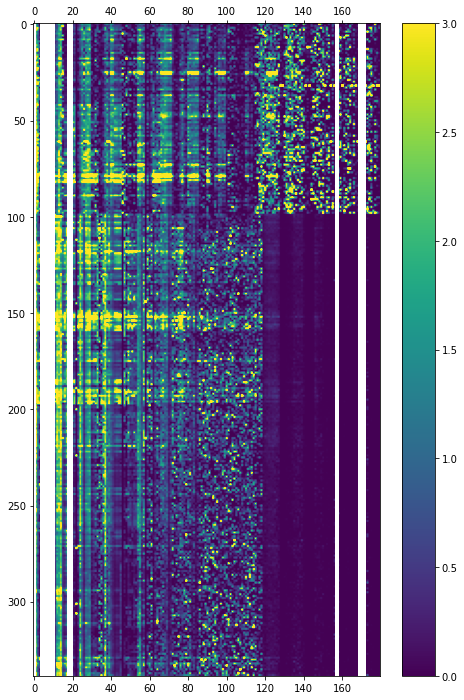

In [119]:
plt.figure(figsize=(8,12))
plt.imshow(x2, vmax=3, vmin=0)
plt.colorbar()

In [120]:
@interact(depth = (0,x2.shape[0],1))
def show_spec(depth):
    fig, axs = plt.subplots(ncols = 2, figsize=(16,12))
    im = axs[0].imshow(x2, vmax=3, vmin=0)
    fig.colorbar(im)
    axs[0].axhline(depth, c='r')
    axs[1].plot(x2[depth,:])
    axs[1].set_ylim(0.1,3)
    #axs[1].set_yscale('log')

interactive(children=(IntSlider(value=169, description='depth', max=339), Output()), _dom_classes=('widget-int…

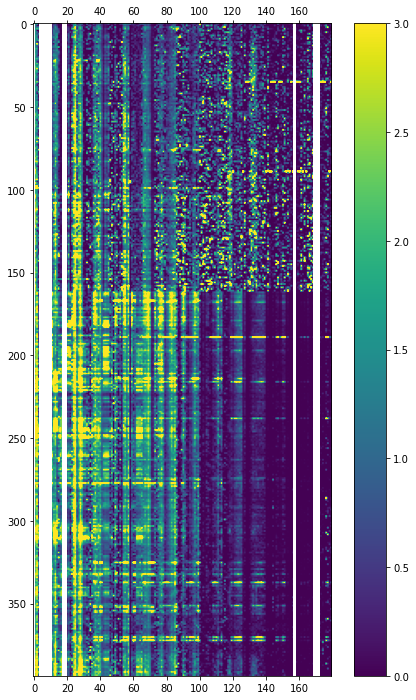

In [91]:
show_spec()

In [4]:
df.size

1864704

In [5]:
df['Well ID'].unique()

array(['15A-17', '23A-17', '23A-19', '24A-8', '337', '349RD2', '38C9',
       '38D9', '41B-8', '46A19RD', '47A-8', '47A-8RD', '51B-16', '52-20',
       '54-7', '54-7RD', nan, '58A-10', '58A10', '58A18', '67-17',
       '67C-17', '68-20', '68-20RD', '68-6', '73-19', '83B-16', '84-30',
       '86-17', '88-20'], dtype=object)

In [6]:
df.shape

(9712, 192)

<AxesSubplot:>

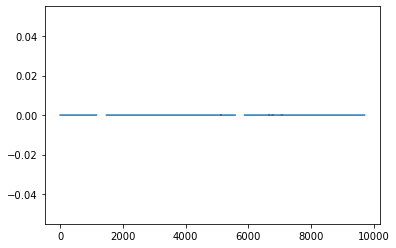

In [7]:
df.AMU1.plot()

In [8]:
# Yields MemoryError: Unable to allocate 319. TiB for an array with shape (43812872618454,) and data type float64
#profile = ProfileReport(df, title='COSO fluid inclusions profiling')
#profile

We can't load the file into pandas profiling as it's too large but the values need to be floats, we could perhaps change them to float32 to save some space but that probably won't be enough.

From [this](https://www.zdnet.com/article/how-much-does-1-5tb-of-ram-cost/) webpage, 1TB of RAM costs USD12,000 so for 319 TB the base cost would be USD3,828,000

## `missingno`

<AxesSubplot:>

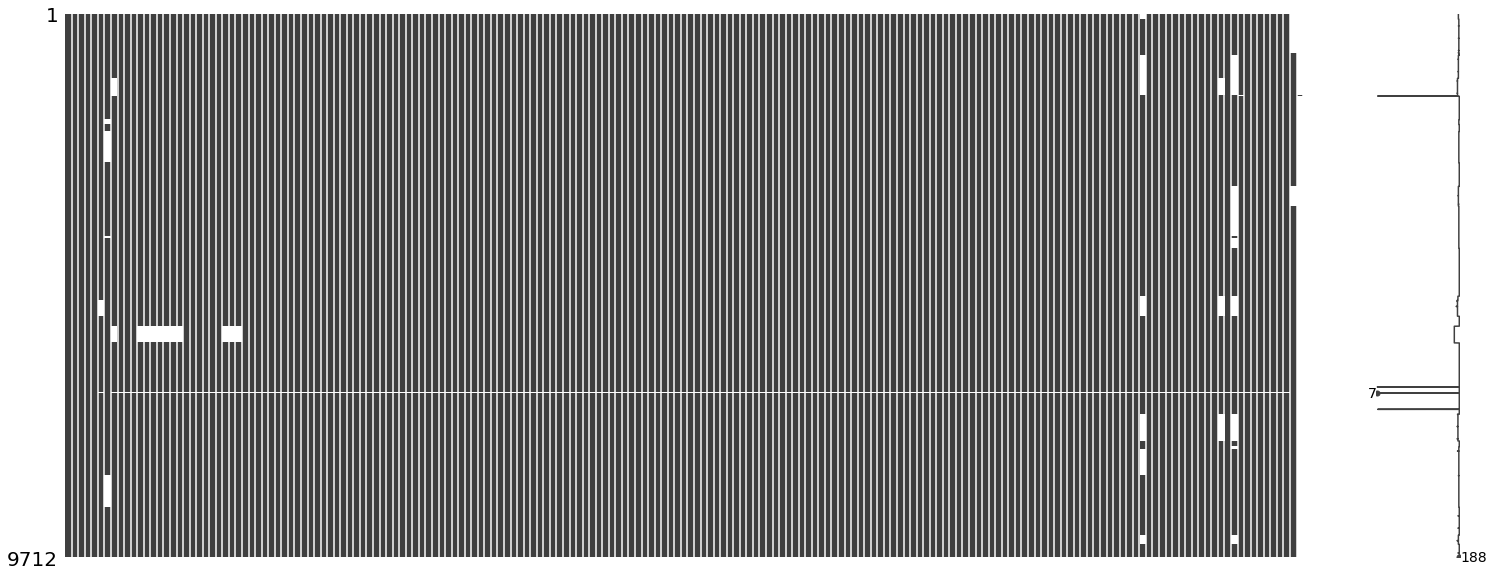

In [9]:
msno.matrix(df)

In [10]:
well_data = df[df['Well ID'] == "88-20"]


In [11]:
# #N2 = AMU28
# Ar = AMU40
# CO2 = AMU44
# CH4 = AMU16
# propane = AMU43
# propene = AMU39

In [12]:
well_data1 = well_data[['Depth (ft)','AMU28','AMU40','AMU44','AMU16','AMU43','AMU39']]
well_data1 = well_data1.rename(columns={'Depth (ft)': 'DEPTH'})

In [13]:
well_data1

,DEPTH,AMU28,AMU40,AMU44,AMU16,AMU43,AMU39
9316,490.0,719500.0,2613.0,1114000.0,0.0,36610.0,1915.0
9317,510.0,818800.0,6588.0,633400.0,0.0,32350.0,4171.0
9318,530.0,1878000.0,7355.0,698500.0,0.0,15330.0,5513.0
9319,550.0,1659000.0,8538.0,1841000.0,189200.0,46140.0,3683.0
9320,570.0,889300.0,5935.0,1375000.0,308300.0,65300.0,11040.0
...,...,...,...,...,...,...,...
9707,8070.0,4197000.0,8900.0,3573000.0,469300.0,313900.0,6881.0
9708,8090.0,3765000.0,9948.0,3195000.0,437000.0,304600.0,5152.0
9709,8110.0,5340000.0,10790.0,4062000.0,971900.0,424800.0,10290.0
9710,8130.0,4541000.0,11590.0,3823000.0,0.0,323600.0,7102.0


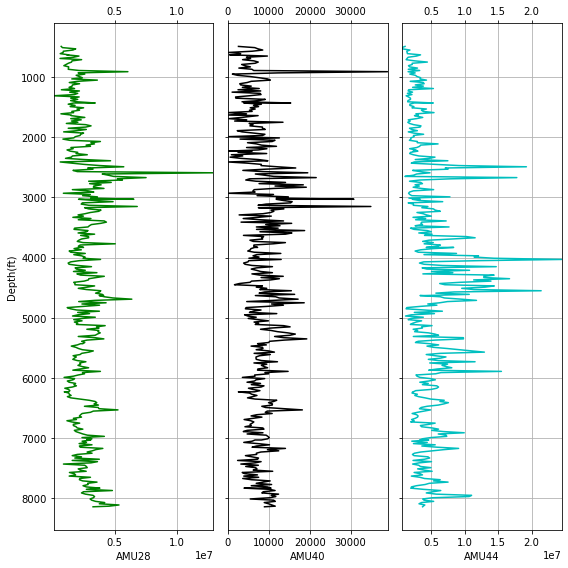

In [30]:
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(8, 8), sharey=True)

ax[0].plot(well_data1.AMU28, well_data1.DEPTH, color='green')
ax[1].plot(well_data1.AMU40, well_data1.DEPTH, color='black')
ax[2].plot(well_data1.AMU44, well_data1.DEPTH, color='c')
for i in range(len(ax)):
    #ax[i].set_ylim(well_data1.DEPTH[0], well_data1.DEPTH[-1])
    ax[i].invert_yaxis()
    ax[i].grid()

ax[0].set_xlabel("AMU28")
ax[0].set_xlim(well_data1.AMU28.min(), well_data1.AMU28.max())
ax[0].set_ylabel("Depth(ft)")
ax[1].set_xlabel("AMU40")
ax[1].set_xlim(well_data1.AMU40.min(), well_data1.AMU40.max())
ax[2].set_xlabel("AMU44")
ax[2].set_xlim(well_data1.AMU44.min(), well_data1.AMU44.max())

plt.tight_layout()

